<a href="https://colab.research.google.com/github/LeonardooBecker/TA4-VisaoComputacional/blob/main/TA4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
import statistics
import matplotlib.pyplot as plt
import numpy as np
import statistics

In [15]:
iris = load_iris()
ds = pd.DataFrame(data=iris.data, columns=iris.feature_names)

In [4]:
# Média por categoria
mean_by_class = ds.mean()
print('\nMédia por Categoria:')
print(mean_by_class)

# Desvio padrão por categoria
std_by_class = ds.std()
print('\nDesvio Padrão por Categoria:')
print(std_by_class)

# Moda por categoria
mode_by_class = ds.agg(lambda x: x.mode().iat[0])
print('\nModa por Categoria:')
print(mode_by_class)

# Frequência de cada categoria
class_counts = ds.value_counts()
print('\nFrequência de Cada Categoria:')
print(class_counts)



Média por Categoria:
sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64

Desvio Padrão por Categoria:
sepal length (cm)    0.828066
sepal width (cm)     0.435866
petal length (cm)    1.765298
petal width (cm)     0.762238
dtype: float64

Moda por Categoria:
sepal length (cm)    5.0
sepal width (cm)     3.0
petal length (cm)    1.4
petal width (cm)     0.2
dtype: float64

Frequência de Cada Categoria:
sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
5.8                2.7               5.1                1.9                 2
6.2                2.2               4.5                1.5                 1
                   2.9               4.3                1.3                 1
                   3.4               5.4                2.3                 1
6.3                2.3               4.4                1.3                 1
                                                

In [16]:
partes = np.array_split(ds, 3)
parte1=partes[0]
parte2=partes[1]
parte3=partes[2]

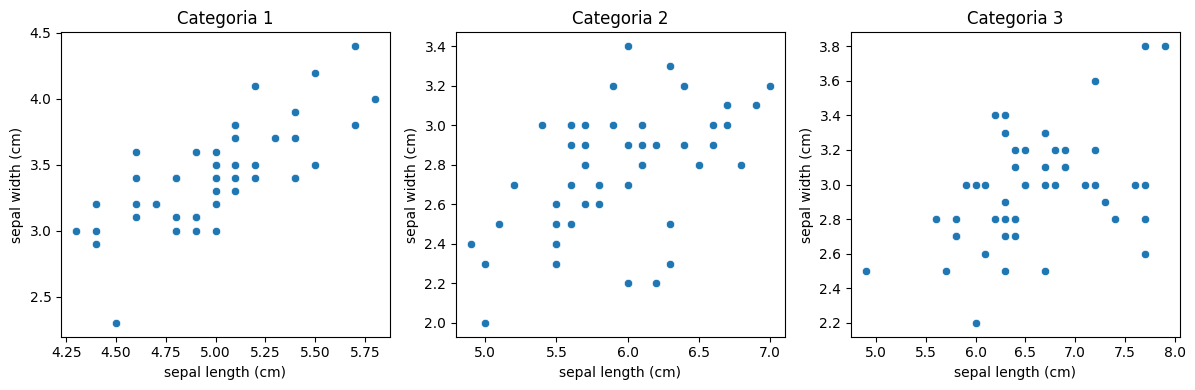

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Gráfico de dispersão da relação entre comprimento e largura da sépala por categoria

fig, axs = plt.subplots(1, 3, figsize=(12, 4))

# Gráfico de dispersão para a primeira parte do dataframe
sns.scatterplot(data=parte1, x='sepal length (cm)', y='sepal width (cm)', ax=axs[0])
axs[0].set_title('Categoria 1')

# Gráfico de dispersão para a segunda parte do dataframe
sns.scatterplot(data=parte2, x='sepal length (cm)', y='sepal width (cm)', ax=axs[1])
axs[1].set_title('Categoria 2')

# Gráfico de dispersão para a terceira parte do dataframe
sns.scatterplot(data=parte3, x='sepal length (cm)', y='sepal width (cm)', ax=axs[2])
axs[2].set_title('Categoria 3')

plt.tight_layout()
plt.show()

Media das diferenças de sépala para categoria 0 do dataframe: 0.21799999999999997
Media das diferenças de pétala para categoria 0 do dataframe: 0.13199999999999995
Media das diferenças de sépala para categoria 1 do dataframe: 0.6579999999999997
Media das diferenças de pétala para categoria 1 do dataframe: 0.3940000000000001
Media das diferenças de sépala para categoria 2 do dataframe: 0.6620000000000001
Media das diferenças de pétala para categoria 2 do dataframe: 0.42599999999999993


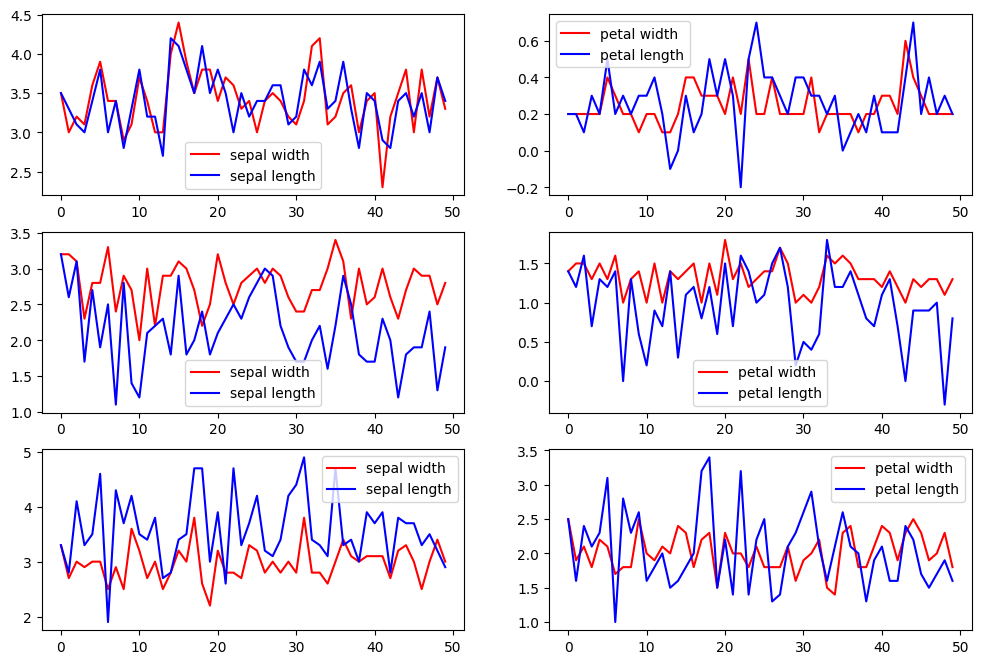

In [19]:
fig, axs = plt.subplots(3, 2, figsize=(12, 8))

for j in range(3):
  # Comparação sepal length e petal width
  x = np.arange(len(partes[j]))
  swY = np.array(partes[j]['sepal width (cm)'])
  axs[j][0].plot(x,swY, label='sepal width', color='red')

  slY=np.array(partes[j]['sepal length (cm)'])
  diffFP=slY[0]-swY[0]
  for i in range(len(slY)):
    slY[i]=slY[i]-diffFP
  axs[j][0].plot(x,slY, label='sepal length', color='blue')

  #Calcular a media das diferenças quando inicio sobreposto
  total=0
  for i in range(len(slY)):
    total+=abs(slY[i]-swY[i])
  print(f'Media das diferenças de sépala para categoria {str(j)} do dataframe: {str(total/len(slY))}')
  axs[j][0].legend();

  # Comparação petal length e petal width
  x = np.arange(len(partes[j]))
  pwY = np.array(partes[j]['petal width (cm)'])
  axs[j][1].plot(x,pwY, label='petal width', color='red')

  plY=np.array(partes[j]['petal length (cm)'])
  diffFP=plY[0]-pwY[0]
  for i in range(len(plY)):
    plY[i]=plY[i]-diffFP
  axs[j][1].plot(x,plY, label='petal length', color='blue')

  #Calcular a media das diferenças quando inicio sobreposto
  total=0
  for i in range(len(plY)):
    total+=abs(plY[i]-pwY[i])
  print(f'Media das diferenças de pétala para categoria {str(j)} do dataframe: {str(total/len(plY))}')
  axs[j][1].legend();



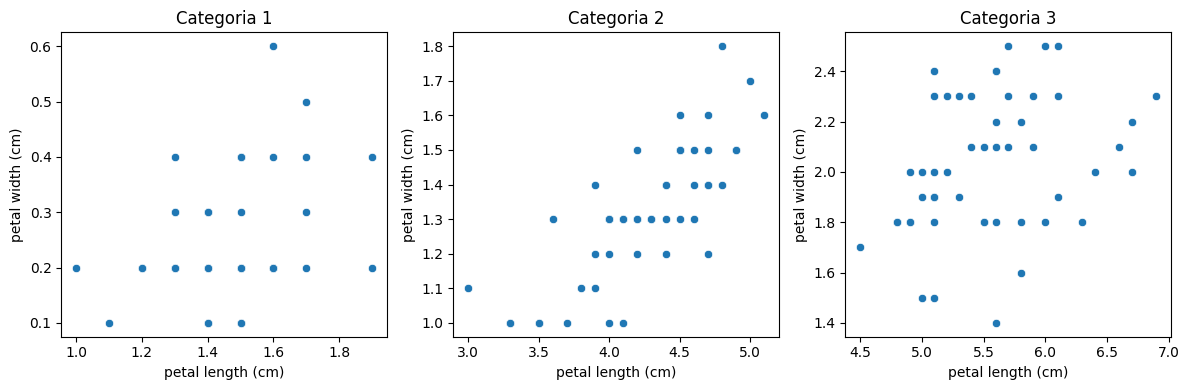

In [20]:
# Gráfico de dispersão da relação entre comprimento e largura da sépala por categoria

fig, axs = plt.subplots(1, 3, figsize=(12, 4))

# Gráfico de dispersão para a primeira parte do dataframe
sns.scatterplot(data=parte1, x='petal length (cm)', y='petal width (cm)', ax=axs[0])
axs[0].set_title('Categoria 1')

# Gráfico de dispersão para a segunda parte do dataframe
sns.scatterplot(data=parte2, x='petal length (cm)', y='petal width (cm)', ax=axs[1])
axs[1].set_title('Categoria 2')

# Gráfico de dispersão para a terceira parte do dataframe
sns.scatterplot(data=parte3, x='petal length (cm)', y='petal width (cm)', ax=axs[2])
axs[2].set_title('Categoria 3')

plt.tight_layout()
plt.show()

In [21]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Carregar o conjunto de dados Iris como exemplo
iris = load_iris()
X = iris.data
y = iris.target

# Dividir o conjunto de dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar um classificador k-NN com k=3
knn = KNeighborsClassifier(n_neighbors=3)

# Treinar o classificador com o conjunto de treinamento
knn.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = knn.predict(X_test)


# Calcular a acurácia das previsões
accuracy = accuracy_score(y_test, y_pred)

# Exibir a acurácia
print("Acurácia no conjunto de teste:", accuracy)

pred=knn.predict(X)
ac=accuracy_score(pred,iris.target)
print("Acurácia no conjunto todo: ", ac)

Acurácia no conjunto de teste: 1.0
Acurácia no conjunto todo:  0.96


Aqui é possível observar que o resultado da acurácia para o conjunto de testes foi **1.0**, portanto, acertou todas as classicações, mas para esse mesmo classificador KNN treinado, quando submetido ao database inteiro a fim de testar sua credibilidade, o resultado obtido foi **0.96**, ou seja, ainda esta sucetível a erros.